In [1]:
import numpy as np
from scipy import linalg 
import networkx as nx

# Check if adjacency matrix $A$ represents a DAG

## Method 1

Morales-Alvarez et al. (2021) refer to Zhang et al. (2018) to show that an adjacency matrix $A$ represents a [DAG](https://en.wikipedia.org/wiki/Directed_acyclic_graph) iff:

<br>

$$\Large \mathcal{R}(A) = 0$$

where:

$$\large \mathcal{R}(A) = tr(e^{A \odot A}) - d$$

where:

* $A$ is the adjacency matrix of a graph $G$
* $tr(\cdot)$ is a trace of a matrix
* $d$ is a number of nodes in $G$
* $\odot$ is an element-wise product ([Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)))


## Method 2

Method 2, cited in Peters et al. (2017) has been proved by McKay et al. (2004).

The theorem states that the adjacency matrix $A$ represents a DAG $G$ iff:

$$\Large \forall a_{ij} \in [A + I], a_{ij} \in \{0, 1\} $$

and 

$$\Large \forall \lambda_{A + I}, \lambda_{A + I} \in \mathbb{R} \land \lambda_{A + I} > 0$$

where:

* $a_{ij}$ is the $ij^{th}$ entry in the adjacency marrix $A$ of a graph $G$
* $I$ is the identity matrix of size $d_A \times d_A$
* $\lambda_{A+I}$ are the eigenvalues of matrix $A+I$

_______________________

<br>

**NOTE**: Method 2 only works for **non-weighhted** adjacency matrices.
____________________

## References

[McKay et al. - Acyclic Digraphs and Eigenvalues of (0,1)-Matrices (2004)](https://arxiv.org/pdf/math/0310423.pdf)

[Morales-Alvarez et al. - VICause: Simultaneous Missing Value Imputation and Causal Discovery with Groups (2021)](https://arxiv.org/pdf/2110.08223.pdf) 

[Peters et al. - Elements of Causal Inference (2017)](https://library.oapen.org/bitstream/id/056a11be-ce3a-44b9-8987-a6c68fce8d9b/11283.pdf)

[Zhang et al. - DAGs with NO TEARS: Continuous Optimization for Structure Learning (2018)](https://arxiv.org/pdf/1803.01422.pdf)

In [57]:
def check_if_dag_1(graph):
    A = nx.linalg.graphmatrix.adjacency_matrix(graph).todense()
    return np.trace(linalg.expm(A * A)) - A.shape[0] == 0

def check_if_dag_2(graph):
    # Get adj matrix
    A = nx.linalg.graphmatrix.adjacency_matrix(graph).todense()
    
    # A + I
    A_plus_I = A + np.eye(A.shape[0])
    
    # Check if 0-1 matrix
    if not np.isin(A_plus_I, [0, 1]).all():
        return False
        
    # Compute eigenvals
    eigenvals = np.linalg.eigvals(A_plus_I)
    
    # Check if all eigenvals > 0 and reals
    if (eigenvals > 0).all() and not np.iscomplex(eigenvals).any():
        return True
    
    return False

## DAG

In [58]:
# Create a graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(np.arange(6))

# Add edges
G.add_edges_from(
    [
        (0, 1),
        (0, 3),
        (0, 5),
        (1, 2),
        (2, 5),
        (3, 4),
        (4, 5)
    ]
)

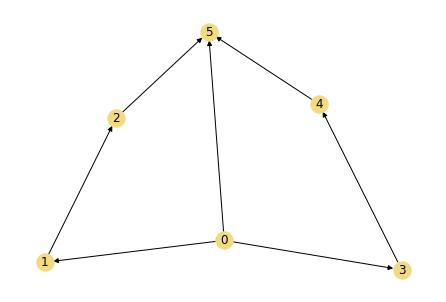

In [59]:
# Plot the graph
nx.draw(G, with_labels=True, node_color='#f2da80')

In [60]:
# Get the adjacency matrix
A = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
A

matrix([[0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0]], dtype=int32)

In [61]:
# Check if G is a DAG - Method 1
check_if_dag_1(G)

True

In [62]:
# Check if G is a DAG - Method 2
check_if_dag_2(G)

True

## Non-DAG

In [63]:
# Create a graph
G_non = nx.DiGraph()

# Add nodes
G_non.add_nodes_from(np.arange(6))

# Add edges
G_non.add_edges_from(
    [
        (0, 1),
        (0, 3),
        (0, 5),
        (1, 2),
        (2, 5),
        (3, 4),
        (4, 5),
        (5, 0),
        (0, 0)
    ]
)

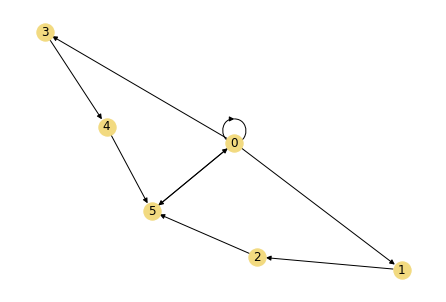

In [64]:
# Plot the graph
nx.draw(G_non, with_labels=True, node_color='#f2da80')

In [65]:
# Get the adjacency matrix
A = nx.linalg.graphmatrix.adjacency_matrix(G_non).todense()
A

matrix([[1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0]], dtype=int32)

In [66]:
# Check if G is a DAG - Method 1
check_if_dag_1(G_non)

False

In [67]:
# Check if G is a DAG - Method 2
check_if_dag_2(G_non)

False